This file includes all the work in the weather.gov

In [2]:
import requests
import json

lat = "42.0899"
lon = "-75.9712"

genius = requests.get(f"https://api.weather.gov/points/{lat},{lon}")


json_file = genius.json()
json_file

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/42.0899,-75.9712',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-75.9712, 42.0899]},
 'properties': {'@id': 'https://api.weather.gov/p

In [5]:
json_file["@context"]

['https://geojson.org/geojson-ld/geojson-context.jsonld',
 {'@version': '1.1',
  'wx': 'https://api.weather.gov/ontology#',
  's': 'https://schema.org/',
  'geo': 'http://www.opengis.net/ont/geosparql#',
  'unit': 'http://codes.wmo.int/common/unit/',
  '@vocab': 'https://api.weather.gov/ontology#',
  'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
  'city': 's:addressLocality',
  'state': 's:addressRegion',
  'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
  'bearing': {'@type': 's:QuantitativeValue'},
  'value': {'@id': 's:value'},
  'unitCode': {'@id': 's:unitCode', '@type': '@id'},
  'forecastOffice': {'@type': '@id'},
  'forecastGridData': {'@type': '@id'},
  'publicZone': {'@type': '@id'},
  'county': {'@type': '@id'}}]

In [3]:
json_file["properties"]["forecast"]
forecast = json_file["properties"]["forecast"]
new_request= requests.get(forecast)
json = new_request.json()
json



{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#'}],
 'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-75.9938139, 42.0956646],
    [-75.9979146, 42.074095899999996],
    [-75.9688548, 42.071050199999995],
    [-75.9647479, 42.092618599999994],
    [-75.9938139, 42.0956646]]]},
 'properties': {'updated': '2023-03-20T19:22:17+00:00',
  'units': 'us',
  'forecastGenerator': 'BaselineForecastGenerator',
  'generatedAt': '2023-03-20T20:29:34+00:00',
  'updateTime': '2023-03-20T19:22:17+00:00',
  'validTimes': '2023-03-20T13:00:00+00:00/P8D',
  'elevation': {'unitCode': 'wmoUnit:m', 'value': 341.0712},
  'periods': [{'number': 1,
    'name': 'This Afternoon',
    'startTime': '2023-03-20T16:00:00-04:00',
    'endTime': '2023-03-20T18:

In [4]:
periods = json["properties"]["periods"]
for i in range(len(periods)):
    print(periods[i]["name"])
    print(periods[i]["temperature"],periods[i]["temperatureUnit"])
    print(periods[i]["windSpeed"],periods[i]["windDirection"])
    print(periods[i]["detailedForecast"])
    

This Afternoon
50 F
13 mph W
Sunny, with a high near 50. West wind around 13 mph.
Tonight
29 F
10 mph SW
Mostly clear, with a low around 29. Southwest wind around 10 mph.
Tuesday
53 F
8 to 12 mph SW
Mostly sunny, with a high near 53. Southwest wind 8 to 12 mph.
Tuesday Night
32 F
2 to 8 mph SE
Mostly cloudy, with a low around 32. Southeast wind 2 to 8 mph.
Wednesday
54 F
3 to 12 mph S
A slight chance of rain showers after 2pm. Mostly cloudy, with a high near 54. South wind 3 to 12 mph. Chance of precipitation is 20%.
Wednesday Night
43 F
12 mph S
A chance of rain showers. Mostly cloudy, with a low around 43. Chance of precipitation is 40%.
Thursday
57 F
12 to 17 mph SW
Rain showers likely. Cloudy, with a high near 57. Chance of precipitation is 70%.
Thursday Night
37 F
12 to 17 mph W
Rain showers likely. Cloudy, with a low around 37. Chance of precipitation is 70%.
Friday
46 F
12 mph NW
A chance of rain showers. Cloudy, with a high near 46. Chance of precipitation is 50%.
Friday Night


In [31]:
import csv
with open('wheaher.csv', 'w') as f:  
    csvwriter = csv.writer(f)
    title = ["day","temp","description"]
    csvwriter.writerow(title)
    for i in range(len(periods)):
        name = periods[i]["name"]
        temp = periods[i]["temperature"]
        description = periods[i]["detailedForecast"]
        row = [name,temp,description]
        print(row)
        csvwriter.writerow(row)

['This Afternoon', 50, 'Sunny, with a high near 50. West wind around 13 mph.']
['Tonight', 29, 'Mostly clear, with a low around 29. Southwest wind around 10 mph.']
['Tuesday', 53, 'Mostly sunny, with a high near 53. Southwest wind 8 to 12 mph.']
['Tuesday Night', 32, 'Mostly cloudy, with a low around 32. Southeast wind 2 to 8 mph.']
['Wednesday', 54, 'A slight chance of rain showers after 2pm. Mostly cloudy, with a high near 54. South wind 3 to 12 mph. Chance of precipitation is 20%.']
['Wednesday Night', 43, 'A chance of rain showers. Mostly cloudy, with a low around 43. Chance of precipitation is 40%.']
['Thursday', 57, 'Rain showers likely. Cloudy, with a high near 57. Chance of precipitation is 70%.']
['Thursday Night', 37, 'Rain showers likely. Cloudy, with a low around 37. Chance of precipitation is 70%.']
['Friday', 46, 'A chance of rain showers. Cloudy, with a high near 46. Chance of precipitation is 50%.']
['Friday Night', 33, 'A chance of rain before midnight, then a chance o

In [32]:
import pandas as pd
import requests
sheet = pd.read_csv("wheaher.csv")
sheet

,day,temp,description
0,This Afternoon,50,"Sunny, with a high near 50. West wind around 1..."
1,Tonight,29,"Mostly clear, with a low around 29. Southwest ..."
2,Tuesday,53,"Mostly sunny, with a high near 53. Southwest w..."
3,Tuesday Night,32,"Mostly cloudy, with a low around 32. Southeast..."
4,Wednesday,54,A slight chance of rain showers after 2pm. Mos...
5,Wednesday Night,43,"A chance of rain showers. Mostly cloudy, with ..."
6,Thursday,57,"Rain showers likely. Cloudy, with a high near ..."
7,Thursday Night,37,"Rain showers likely. Cloudy, with a low around..."
8,Friday,46,"A chance of rain showers. Cloudy, with a high ..."
9,Friday Night,33,"A chance of rain before midnight, then a chanc..."


<AxesSubplot:xlabel='day'>

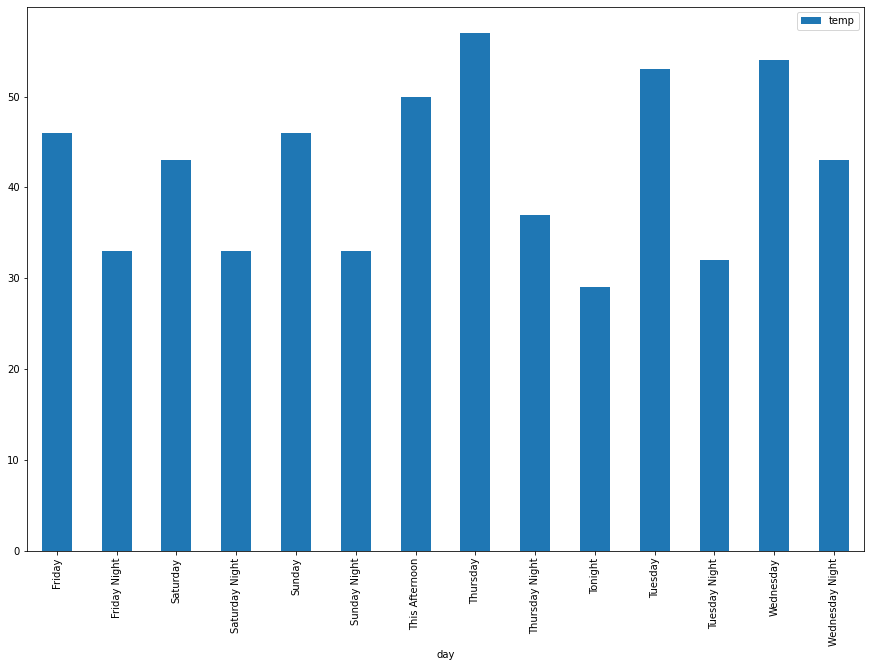

In [33]:
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
list_stocks = sheet.groupby("day")[["temp"]].mean().round()
list_stocks.plot(kind = "bar",figsize=(15, 10))